Aziz ERDEN - 11.02.2023

Bu projeyi Colab da yaptım.

Yararlandığım video [linki](https://www.youtube.com/watch?v=VtRLrQ3Ev-U&ab_channel=freeCodeCamp.org)

Kaggle Proje [Linki](https://www.kaggle.com/code/kredy10/simple-lstm-for-text-classification/notebook)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("spam.csv", encoding = "latin-1")

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
df = df[['v1', 'v2']]

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df["label"] = df["v1"].replace({"ham":0, "spam":1})

In [8]:
df.head()

,v1,v2,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
 2   label   5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [10]:
train, val, test = np.split(df.sample(frac = 1), [int(.8*len(df)), int(.9*len(df))])

In [11]:
len(train), len(val), len(test)

(4457, 557, 558)

In [12]:
def df_to_dataset(dataframe, shuffle=True, batch_size=128):
    df = dataframe.copy()
    labels = df.pop('label')
    df = df["v2"]
    ds = tf.data.Dataset.from_tensor_slices((df, labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(tf.data.AUTOTUNE)
    return ds

In [13]:
train_data = df_to_dataset(train)
valid_data = df_to_dataset(val)
test_data = df_to_dataset(test)

In [14]:
list(train_data)[1]

(<tf.Tensor: shape=(128,), dtype=string, numpy=
 array([b'Does uncle timi help in clearing cars',
        b'Free video camera phones with Half Price line rental for 12 mths and 500 cross ntwk mins 100 txts. Call MobileUpd8 08001950382 or Call2OptOut/674&',
        b'I dont want to hear philosophy. Just say what happen',
        b'I dun believe u. I thk u told him.',
        b'U have a secret admirer who is looking 2 make contact with U-find out who they R*reveal who thinks UR so special-call on 09058094594',
        b'Text & meet someone sexy today. U can find a date or even flirt its up to U. Join 4 just 10p. REPLY with NAME & AGE eg Sam 25. 18 -msg recd@thirtyeight pence',
        b'Your account has been refilled successfully by INR  &lt;DECIMAL&gt; . Your KeralaCircle prepaid account balance is Rs  &lt;DECIMAL&gt; . Your Transaction ID is KR &lt;#&gt; .',
        b'Reply to win \xc3\xa5\xc2\xa3100 weekly! Where will the 2006 FIFA World Cup be held? Send STOP to 87239 to end service'

In [15]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, dtype=tf.string, trainable=True)

In [17]:
hub_layer(list(train_data)[2][0])

<tf.Tensor: shape=(128, 50), dtype=float32, numpy=
array([[ 0.3662365 ,  0.02740204,  0.01977847, ..., -0.1514706 ,
         0.20814778, -0.12584174],
       [-0.14728342, -0.21846409, -0.14082265, ...,  0.01013461,
         0.02658129,  0.18194339],
       [ 0.277939  , -0.24529582, -0.15093935, ...,  0.13294268,
         0.0403192 ,  0.13176167],
       ...,
       [ 0.2944503 , -0.00129047, -0.22974426, ..., -0.05354899,
        -0.10016806,  0.23266757],
       [ 0.15643103,  0.07927064, -0.20531131, ..., -0.1840828 ,
         0.02184081, -0.03170845],
       [ 0.30650502,  0.17671649, -0.15793253, ..., -0.167983  ,
        -0.01055973,  0.11392396]], dtype=float32)>

In [31]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [33]:
model.evaluate(train_data)

35/35 [==============================] - 10s 254ms/step - loss: 0.6687 - accuracy: 0.7534


[0.668714702129364, 0.7534216046333313]

In [34]:
model.evaluate(valid_data)

5/5 [==============================] - 1s 240ms/step - loss: 0.6701 - accuracy: 0.7469


[0.6700977683067322, 0.7468581795692444]

In [35]:
history = model.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
35/35 [==============================] - 68s 2s/step - loss: 0.5325 - accuracy: 0.8649 - val_loss: 0.3892 - val_accuracy: 0.8707
Epoch 2/5
35/35 [==============================] - 68s 2s/step - loss: 0.2549 - accuracy: 0.8876 - val_loss: 0.2239 - val_accuracy: 0.9120
Epoch 3/5
35/35 [==============================] - 68s 2s/step - loss: 0.1301 - accuracy: 0.9677 - val_loss: 0.1500 - val_accuracy: 0.9623
Epoch 4/5
35/35 [==============================] - 67s 2s/step - loss: 0.0580 - accuracy: 0.9944 - val_loss: 0.1020 - val_accuracy: 0.9713
Epoch 5/5
35/35 [==============================] - 65s 2s/step - loss: 0.0269 - accuracy: 0.9966 - val_loss: 0.0886 - val_accuracy: 0.9749


In [37]:
model.evaluate(train_data)

35/35 [==============================] - 9s 265ms/step - loss: 0.0184 - accuracy: 0.9984


[0.01838875003159046, 0.9984294176101685]

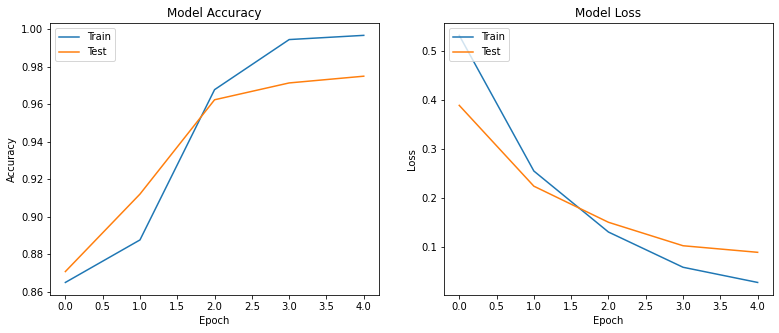

In [36]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"], loc="upper left")

plt.subplot(1,3,2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Test"], loc="upper left")
plt.show();

# LSTM

In [23]:
encoder = tf.keras.layers.TextVectorization(max_tokens=1000)
encoder.adapt(train_data.map(lambda text, label: text))

In [24]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'to', 'i', 'you', 'a', 'the', 'u', 'and', 'is', 'in',
       'me', 'my', 'your', 'for', 'of', 'it', 'have', 'call', 'on'],
      dtype='<U15')

In [26]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary()), output_dim=32,mask_zero=True ),tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [28]:
model.evaluate(train_data)
model.evaluate(valid_data)

5/5 [==============================] - 0s 43ms/step - loss: 0.6927 - accuracy: 0.5817


[0.6927046179771423, 0.5816876292228699]

In [29]:
history = model.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
35/35 [==============================] - 11s 99ms/step - loss: 0.5857 - accuracy: 0.8542 - val_loss: 0.4413 - val_accuracy: 0.8654
Epoch 2/5
35/35 [==============================] - 3s 92ms/step - loss: 0.2830 - accuracy: 0.9017 - val_loss: 0.1825 - val_accuracy: 0.9533
Epoch 3/5
35/35 [==============================] - 4s 111ms/step - loss: 0.1171 - accuracy: 0.9755 - val_loss: 0.1063 - val_accuracy: 0.9677
Epoch 4/5
35/35 [==============================] - 4s 106ms/step - loss: 0.0629 - accuracy: 0.9868 - val_loss: 0.0886 - val_accuracy: 0.9677
Epoch 5/5
35/35 [==============================] - 3s 92ms/step - loss: 0.0404 - accuracy: 0.9901 - val_loss: 0.0920 - val_accuracy: 0.9767


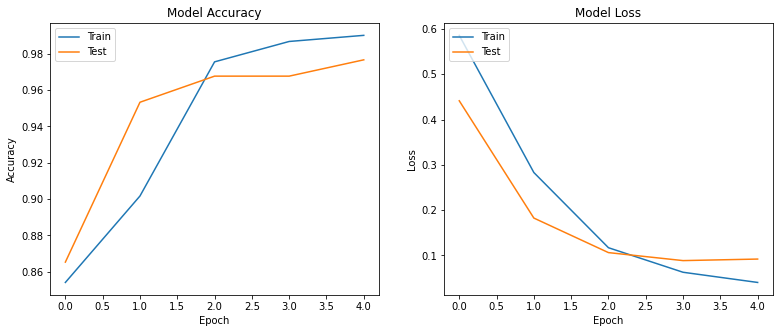

In [30]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"], loc="upper left")

plt.subplot(1,3,2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Test"], loc="upper left")
plt.show();